Simple Exponential smoothing

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,Holt

In [2]:
#Step2:Create n load dataset
#monthly sales data
sales_data = [200,210,215,220,230,225,235,240,250,255,260,265]
#Create time index
dates = pd.date_range(start='2023-01-01', periods=len(sales_data), freq='M')
#Create time series object
sales_series = pd.Series(sales_data, index=dates)

/tmp/ipython-input-3676692211.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2023-01-01', periods=len(sales_data), freq='M')


In [3]:
#create SES model
model = Holt(sales_series)

#fit the model with smoothing level alpha=0.4(0.2,0.3)
fit = model.fit(smoothing_level=0.4,smoothing_slope=0.2,optimized=False)

/tmp/ipython-input-40835918.py:5: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit = model.fit(smoothing_level=0.4,smoothing_slope=0.2,optimized=False)


In [4]:
#Step4:Forecast the next 6 months
forecast = fit.forecast(6)

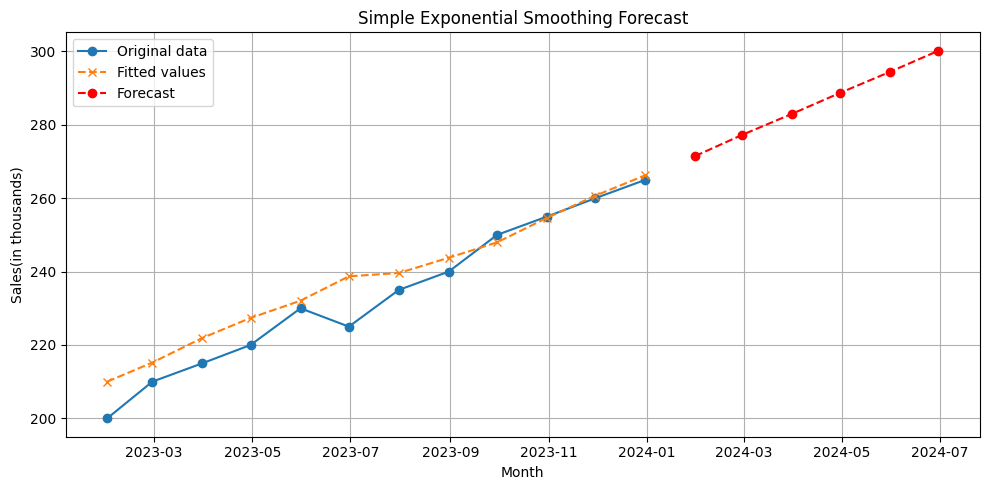

In [5]:
#Step5: Visualize results
plt.figure(figsize=(10,5))
plt.plot(sales_series , label='Original data',marker='o')
plt.plot(fit.fittedvalues , label='Fitted values',linestyle='--',marker='x')
plt.plot(forecast , label='Forecast',linestyle='--',marker='o',color='red')

plt.title('Simple Exponential Smoothing Forecast')
plt.xlabel('Month')
plt.ylabel('Sales(in thousands)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [6]:
#Step6:Print forecast values
print("Forecasted sales(next 6 months):")
print(forecast.round(2))

Forecasted sales(next 6 months):
2024-01-31    271.50
2024-02-29    277.24
2024-03-31    282.98
2024-04-30    288.72
2024-05-31    294.47
2024-06-30    300.21
Freq: ME, dtype: float64


ELECTRICITY USAGE

In [7]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,Holt

In [10]:
df = pd.read_csv('/content/Elctricity_Usage.csv',parse_dates=['Date'],index_col='Date')
print(df.head())

            Consumption
Date                   
2022-01-01          320
2022-02-01          315
2022-03-01          325
2022-04-01          330


In [11]:
print(df.isnull().sum())

Consumption    0
dtype: int64


In [12]:
series = df['Consumption']

In [14]:
model1 = Holt(series)
fit = model1.fit(smoothing_level=0.4,smoothing_slope=0.2,optimized=False)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-3631926932.py:2: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit = model1.fit(smoothing_level=0.4,smoothing_slope=0.2,optimized=False)


In [15]:
forecast = fit.forecast(6)
print("Next 6 months forecast:")
print(forecast.round(2))

Next 6 months forecast:
2022-05-01    317.69
2022-06-01    315.99
2022-07-01    314.29
2022-08-01    312.58
2022-09-01    310.88
2022-10-01    309.18
Freq: MS, dtype: float64


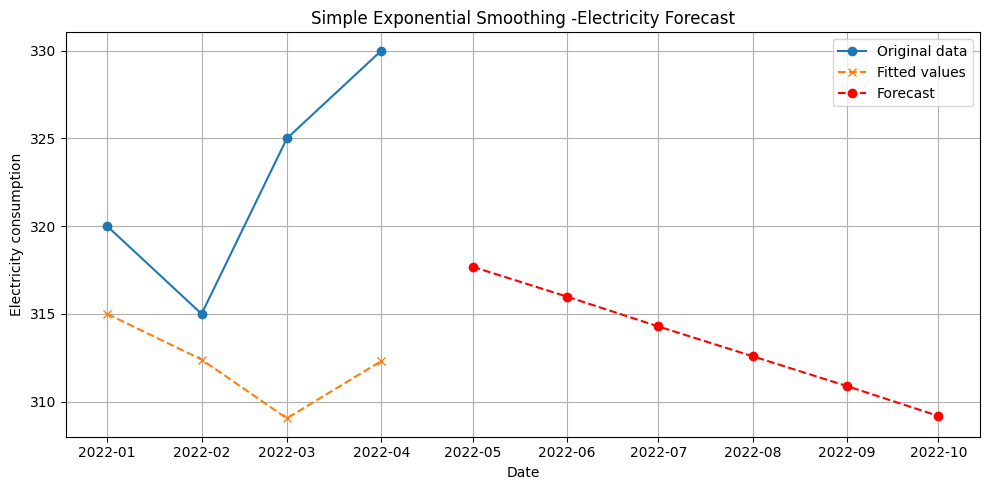

In [16]:
#Step5: Visualize results
plt.figure(figsize=(10,5))
plt.plot(series , label='Original data',marker='o')
plt.plot(fit.fittedvalues , label='Fitted values',linestyle='--',marker='x')
plt.plot(forecast , label='Forecast',linestyle='--',marker='o',color='red')

plt.title('Simple Exponential Smoothing -Electricity Forecast')
plt.xlabel('Date')
plt.ylabel('Electricity consumption')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



```
```

STATIONARY

In [17]:
#Step1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [18]:
#set seed for reproducibility
np.random.seed(42)

In [19]:
#Step2:Build model
#simulate white noise(stationary)
data = np.random.normal(loc=0,scale=1,size=100)
dates = pd.date_range(start='2023-01-01',periods=100,freq='D')
series = pd.Series(data,index=dates)

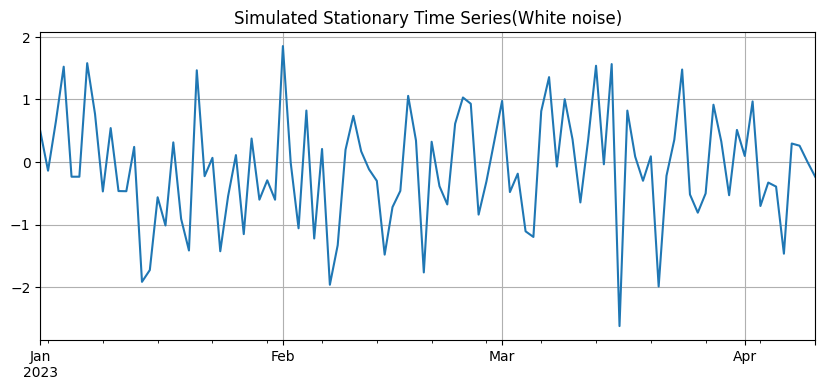

In [20]:
#Step3:Plot stationary data series
plt.figure(figsize=(10,4))
series.plot(title='Simulated Stationary Time Series(White noise)')
plt.grid()
plt.show()

TRAFFIC DATA|


In [21]:
#Step1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [22]:
df = pd.read_csv('/content/website_traffic.csv',parse_dates=['Date'],index_col='Date')
print(df.head())

            Visits
Date              
2024-01-01    1200
2024-02-01    1195
2024-03-01    1220
2024-04-01    1180
2024-05-01    1210


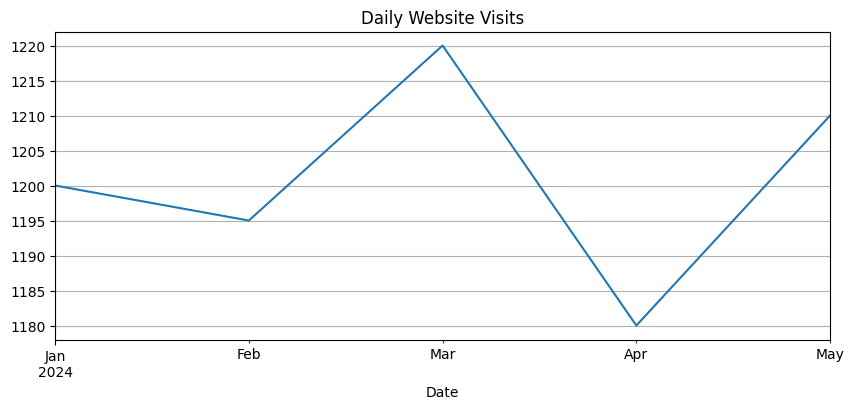

In [23]:
#Plot original time series
df['Visits'].plot(figsize=(10,4),title='Daily Website Visits')
plt.grid()
plt.show()

In [24]:
#perform Augmented Dickey-Fuller(ADF) test
result = adfuller(df['Visits'])
print('ADF Statistic:',result[0])
print('p-value:',result[1])

if result[1] < 0.05:
    print('The series is stationary')
else:
    print('The series is not stationary.Applying differencing...')

ADF Statistic: -4.109375445408512
p-value: 0.0009345359045134847
The series is stationary


In [25]:
#First order differencing
df_diff = df['Visits'].diff().dropna()


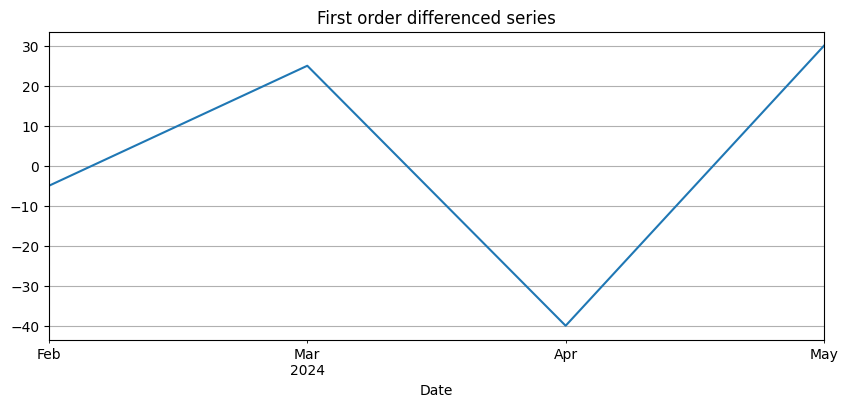

In [26]:
#Plot differenced series
df_diff.plot(figsize=(10,4),title='First order differenced series')
plt.grid()
plt.show()

In [27]:
#re-run ADF test on differenced series
result_diff = adfuller(df_diff)
print('ADF Statistic after differencing:',result_diff[0])
print('p-value after differencing:',result_diff[1])
if result_diff[1] < 0.05:
    print('The differenced series is now stationary..')


ADF Statistic after differencing: -3.5388175323270006
p-value after differencing: 0.007044379192708437
The differenced series is now stationary..
